In [32]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

import functions as f

### Cel statystyczny:

### Cel python: Aplikacja...
![jupyter](should-i-buy-from-kickstarter-main.webp)


#### GRUPA: gold_diggers

In [33]:
#Zaimportowanie pliku z pc
df_clean = f.f_file_import('df_clean.csv')

In [34]:
#tworzymy listy
list_main_cat = f.unique_value_list(df_clean, 'main_category')
list_country = f.unique_value_list(df_clean, 'country')
list_launched_year = f.unique_value_list_sorted(df_clean, 'launched_year')

In [35]:
# widgety
widget_main_cat = f.widget_def(list_main_cat, 'Kategoria')
widget_country = f.widget_def(list_country, 'Kraj' )
widget_launched_year = f.widget_def(list_launched_year, 'Rok uruchomienia zbiórki' )
widget_days = widgets.IntRangeSlider(
    value=[1, 60],
    min=1,
    max=60,
    step=1,
    description='Czas trwania zbiórki:',
    style={'description_width':'initial'},
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
widget_value = widgets.IntText(description='Cel zbiórki >=')

# **<span style="color:#05ce78"> OGÓLNE STATYSTYKI </span>**

# Rozkład liczby zbiórek na rok założenia zbiórki 

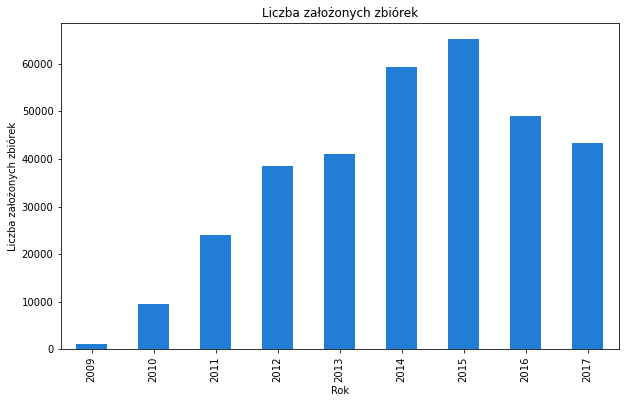

In [36]:
year_count = f.bar_plot_1_var_date(df_clean, 'launched_year', x_label='Rok', y_label='Liczba założonych zbiórek', title_fig='Liczba założonych zbiórek')

# Rozkład liczby zakładanych zbiórek na miesiące

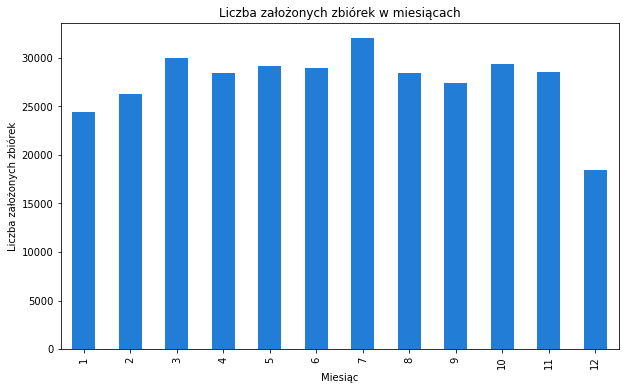

In [37]:
 year_count = f.bar_plot_1_var_date(df_clean, 'launched_month', x_label='Miesiąc', y_label='Liczba założonych zbiórek', title_fig='Liczba założonych zbiórek w miesiącach')

# Rozkład liczby zakładanych zbiórek w krajach

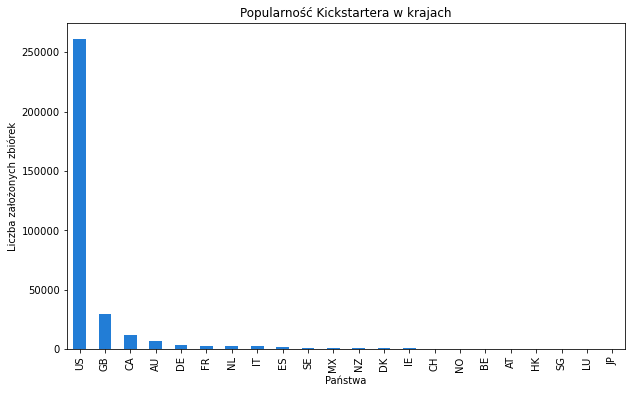

In [38]:
country_count = f.bar_plot_1_var(df_clean, 'country',colors='#227DD6',alph=1, x_label='Państwa', y_label='Liczba założonych zbiórek', title_fig='Popularność Kickstartera w krajach')

# Popularność Kickstartera w wybranych krajach

In [39]:
 widget_country

SelectMultiple(description='Kraj', index=(0,), options=('GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', …

Button(description='Odśwież', style=ButtonStyle())

Output()

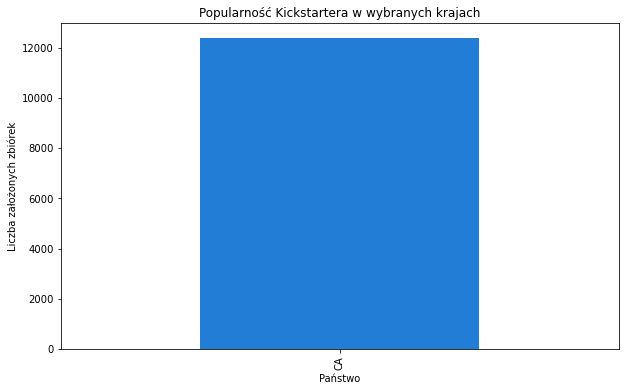

In [40]:
# liczba zbiórek w danym kraju

refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(widget_country.value)
    #tworzę listę wybranych lat
    #list_wdg_launched_year = list(wdg_year_main_category_count__launched_year.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['country'].isin(list_wdg_main_category) )] #& ( df_clean['launched_year'].isin(list_wdg_launched_year) )]
    #Tworzę wykres na podstawie nowego DF
    return f.bar_plot_1_var(df_new, 'country',x_label='Państwo',colors=['#227DD6'], y_label='Liczba założonych zbiórek', title_fig='Popularność Kickstartera w wybranych krajach' )

display(refresh_button, output)
refresh_button.on_click(refresh)

# Popularność kategorii 

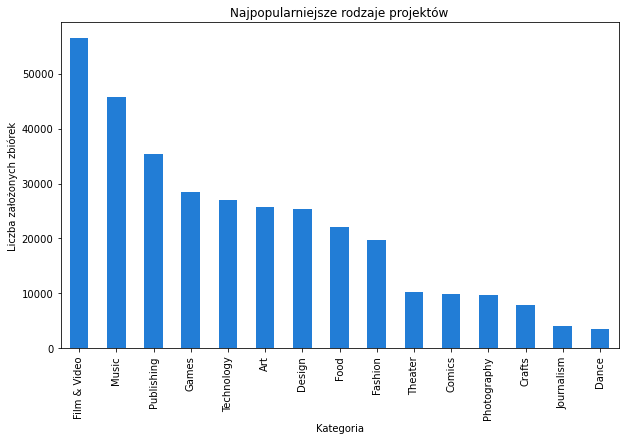

In [41]:
main_category_count = f.bar_plot_1_var(df_clean, 'main_category',colors = '#227DD6',alph=1, x_label='Kategoria', y_label='Liczba założonych zbiórek', title_fig='Najpopularniejsze rodzaje projektów')

# Rozkład udanych i nieudanych zbiórek

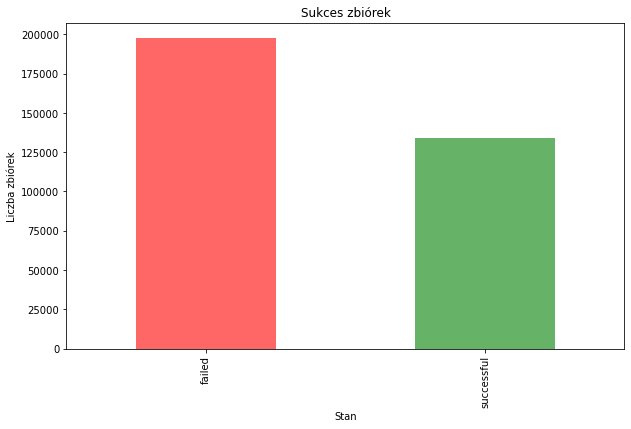

In [42]:
state_count = f.bar_plot_1_var(df_clean, 'state',alph=0.6, x_label='Stan', y_label='Liczba zbiórek', title_fig='Sukces zbiórek')

# Średnia kwota zebrana w kategoriach

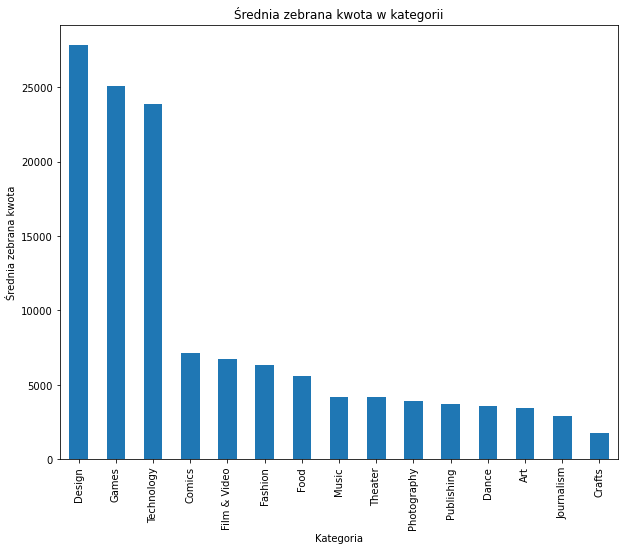

In [43]:
main_category_usd_pledged_real_mean = f.bar_plot_1_var_mean(df_clean, 'main_category', 'usd_pledged_real', x_label='Kategoria', y_label='Średnia zebrana kwota', title_fig='Średnia zebrana kwota w kategorii')

# Jaką kwotę chcesz zebrać?
## Zbiórki odnoszące sukces powyżej danej kwoty

In [44]:
widget_maincat_value = f.widget_layout(widget_main_cat, widget_value)
widget_maincat_value

Box(children=(SelectMultiple(description='Kategoria', index=(0,), options=('Publishing', 'Film & Video', 'Musi…

Button(description='Odśwież', style=ButtonStyle())

Output()

C:\Users\jozab\anaconda3\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


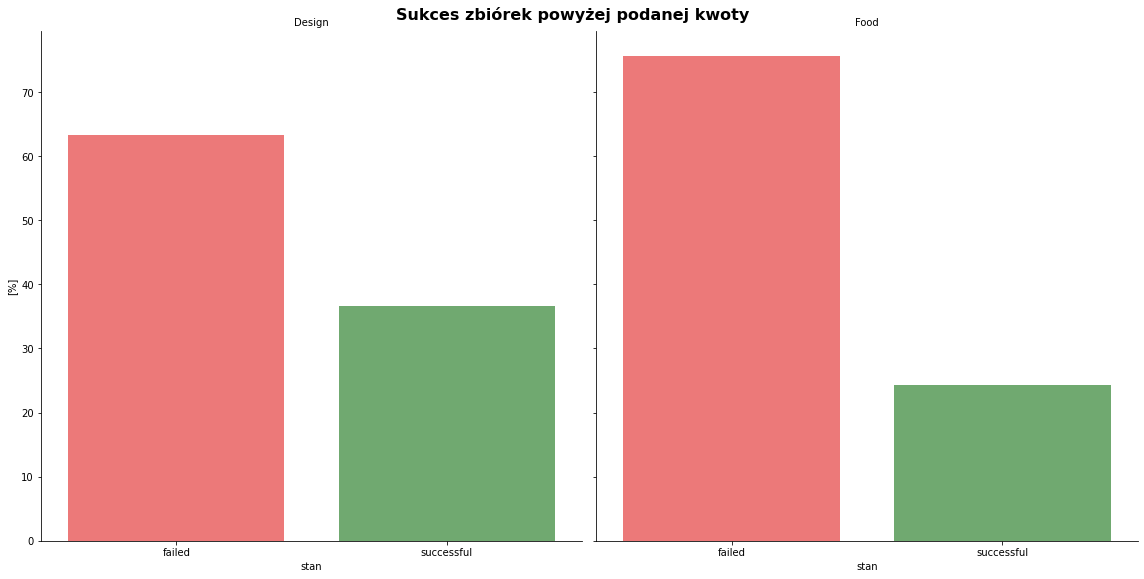

In [64]:
refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()
def refresh(b):
    clear_output()
    display(refresh_button, output)
    value_max = widget_value.value
    list_wdg_main_category = list(widget_main_cat.value)
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category))]  
    return f.filter_greater_equal(df_new, value_max, ['state','main_category'], ['#FF6666','#66B266'], 'stan', '[%]', 'Sukces zbiórek powyżej podanej kwoty')
display(refresh_button, output)
refresh_button.on_click(refresh)

# Udane i nieudane zbiórki rozkład procentowy

In [46]:
widget_country

SelectMultiple(description='Kraj', index=(0,), options=('GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', …

In [47]:
# liczba zbiórek w danym kraju
refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_country = list(widget_country.value)
    #tworzę listę wybranych lat
    #list_wdg_launched_year = list(wdg_year_main_category_count__launched_year.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['country'].isin(list_wdg_country) )] #& ( df_clean['launched_year'].isin(list_wdg_launched_year) )]
    #Tworzę wykres na podstawie nowego DF
    f.barplot_pct(df_new,['country', 'state'], x_label='Państwa',y_label='[%]', title_fig='Udane i nieudane zbiórki w wybranych państwach')
    f.barplot_pct(df_new,['state', 'country'], ['#FF6666','#66B266'], x_label='stan',y_label='[%]', title_fig='Sukces zbiórek w wybranych krajach')

display(refresh_button, output)
refresh_button.on_click(refresh)

Button(description='Odśwież', style=ButtonStyle())

Output()

# Średnia kwota celu zbiórki dla krajów w podziale na udane i nieudane zbiórki

In [48]:
widget_country

SelectMultiple(description='Kraj', index=(0,), options=('GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', …

In [49]:
refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(widget_country.value)
    #tworzę listę wybranych lat
    #list_wdg_launched_year = list(wdg_year_main_category_count__launched_year.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['country'].isin(list_wdg_main_category) )] #& ( df_clean['launched_year'].isin(list_wdg_launched_year) )]
    #Tworzę wykres na podstawie nowego DF
    df_new1 = f.aggregate_fun(df_new, ['country', 'state'], 'usd_goal_real')
    df_new2 = f.aggregate_fun(df_new, ['country', 'state'], 'usd_pledged_real')
    f.bar_plot_2_var(df_new1, 'country', 'state', 'mean_x', ['#FF6666','#66B266'],2,8, x_label='Stan', y_label='średnia kwota celu [$]', title_fig='Średnia kwota celu zbiórek')
    f.bar_plot_2_var(df_new2, 'country', 'state', 'mean_x', ['#FF6666','#66B266'],2,8, x_label='Stan', y_label='średnia zebrana kwota [$]', title_fig='Średnia zebrana kwota ze zbiórek')

display(refresh_button, output)
refresh_button.on_click(refresh)

Button(description='Odśwież', style=ButtonStyle())

Output()

# Popularność kategorii w krajach [%]

In [62]:
widget_maincat_country = f.widget_layout(widget_main_cat, widget_country)
widget_maincat_country

Box(children=(SelectMultiple(description='Kategoria', index=(1,), options=('Publishing', 'Film & Video', 'Musi…

Button(description='Odśwież', style=ButtonStyle())

Output()

C:\Users\jozab\anaconda3\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


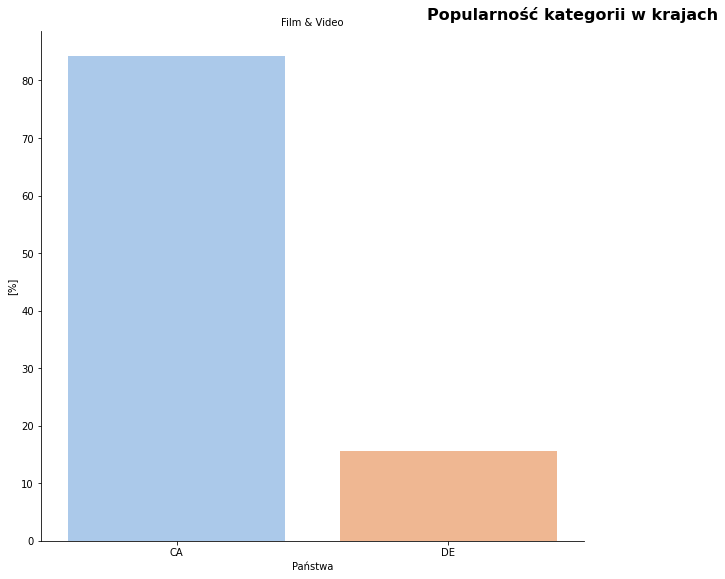

In [63]:
refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()
def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(widget_main_cat.value)
    #tworzę listę wybranych lat
    list_wdg_country = list(widget_country.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category) ) & ( df_clean['country'].isin(list_wdg_country) )]
    #Tworzę wykres na podstawie nowego DF
    return f.barplot_pct(df_new,['country', 'main_category'],  x_label='Państwa', y_label='[%]', title_fig="Popularność kategorii w krajach")
display(refresh_button, output)
refresh_button.on_click(refresh)

# W liczbach 

In [52]:
widget_maincat_country = f.widget_layout(widget_main_cat, widget_country)
widget_maincat_country

Box(children=(SelectMultiple(description='Kategoria', index=(0,), options=('Publishing', 'Film & Video', 'Musi…

In [53]:
refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    print(type(b))
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(widget_main_cat.value)
    #tworzę listę wybranych lat
    list_wdg_country = list(widget_country.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category) ) & ( df_clean['country'].isin(list_wdg_country) )]
    #Tworzę wykres na podstawie nowego DF
    return f.count_plot_col(df_new, 'main_category', 'country', 2,8, x_label="Państwa", y_label='Liczba zbiórek', title_fig='Popularność kategorii w krajach')

display(refresh_button, output)
refresh_button.on_click(refresh)

Button(description='Odśwież', style=ButtonStyle())

Output()

# Mediana zakładanych celów zbiórek na ktegorie i kraj i sukcesy

In [54]:
widget_maincat_country = f.widget_layout(widget_main_cat, widget_country)
widget_maincat_country

Box(children=(SelectMultiple(description='Kategoria', index=(0,), options=('Publishing', 'Film & Video', 'Musi…

In [55]:
refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(widget_main_cat.value)
    #tworzę listę wybranych lat
    list_wdg_country = list(widget_country.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category) ) & ( df_clean['country'].isin(list_wdg_country) )]
    #Tworzę wykres na podstawie nowego DF
    return f.bar_plot_3_var(df_new, var_col = 'main_category', var_x = 'country', var_y = 'median_x', hue_var = 'state',zmienna_ilosciowa = 'usd_goal_real', palette_list = ['#FF6666','#66B266'],column_wrap =2, height_value = 6, x_label='Państwa', y_label='Mediana celu zbiórek', title_fig='Przeciętna kwota celu')

display(refresh_button, output)
refresh_button.on_click(refresh)

Button(description='Odśwież', style=ButtonStyle())

Output()

# Popularność katergorii w latach 

In [56]:
#Widget do poniższych wykresów
widget_maincat_launched_year = f.widget_layout(widget_main_cat, widget_launched_year)
widget_maincat_launched_year

Box(children=(SelectMultiple(description='Kategoria', index=(0,), options=('Publishing', 'Film & Video', 'Musi…

In [57]:
refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(widget_main_cat.value)
    #tworzę listę wybranych lat
    list_launched_year = list(widget_launched_year.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category) ) & ( df_clean['launched_year'].isin(list_launched_year) )]
    #Tworzę wykres na podstawie nowego DF
    return f.count_plot_col(df_new, 'main_category', 'launched_year', x_label='Rok', y_label='Liczba zbiórek', title_fig='Popularność kategorii w latach')

display(refresh_button, output)
refresh_button.on_click(refresh)

Button(description='Odśwież', style=ButtonStyle())

Output()

# Wpływ czasu trwania zbiórki na jej sukces w liczbach

In [58]:
widget_maincat_days = f.widget_layout(widget_main_cat, widget_days)
widget_maincat_days

Box(children=(SelectMultiple(description='Kategoria', index=(0,), options=('Publishing', 'Film & Video', 'Musi…

In [59]:
refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(widget_main_cat.value)
    #tworzę listę wybranych lat
    days_tuple = list(widget_days.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category)) & (df_clean['duration'] >= days_tuple[0]) & (df_clean['duration'] <= days_tuple[1])]
    #Tworzę wykres na podstawie nowego DF
    return f.bar_plot_3_var(df_new, 'main_category', 'duration', 'count_x', 'state', 'ID', ['#FF6666','#66B266'], 1, 15,x_label='Dni',y_label='Liczba zbiórek',title_fig='Wpływ czasu trwania zbiórki na jej sukces')

display(refresh_button, output)
refresh_button.on_click(refresh)

Button(description='Odśwież', style=ButtonStyle())

Output()

# Wpływ czasu trwania zbiórki na jej sukces w %

In [60]:
widget_maincat_days = f.widget_layout(widget_main_cat, widget_days)
widget_maincat_days

Box(children=(SelectMultiple(description='Kategoria', index=(0,), options=('Publishing', 'Film & Video', 'Musi…

In [61]:
refresh_button = widgets.Button(description="Odśwież")
output = widgets.Output()


def refresh(b):
    clear_output()
    display(refresh_button, output)
    #tworzę listę wybranych kategorii
    list_wdg_main_category = list(widget_main_cat.value)
    #tworzę listę wybranych lat
    days_tuple = list(widget_days.value)
    #Filtruję DF wg wybranych kategorii
    df_new = df_clean[( df_clean['main_category'].isin(list_wdg_main_category)) & (df_clean['duration'] >= days_tuple[0]) & (df_clean['duration'] <= days_tuple[1])]
    #Tworzę wykres na podstawie nowego DF
    return f.barplot_pct_3_var(df_new, ['main_category','duration','state'], x_label='Czas trwania zbiórki', y_label='[%]', title_fig='Wpływ czasu trwania zbiórki na jej sukces')

display(refresh_button, output)
refresh_button.on_click(refresh)

Button(description='Odśwież', style=ButtonStyle())

Output()